In [2]:
%pip install requests


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the dataset
url = 'https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/2a362139-b782-43b1-b3cb-078a2ef19524/download/vaccines_by_age_phu.csv'

# Attempt to download the dataset with headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0.3 Safari/605.1.15'
}
response = requests.get(url, headers=headers)
response.raise_for_status()  # Check that the request was successful

# Load the dataset into a pandas DataFrame
data = pd.read_csv(StringIO(response.text))

/var/folders/5f/l3v2_4ms44z125nm751rrzym0000gq/T/ipykernel_91892/902945963.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




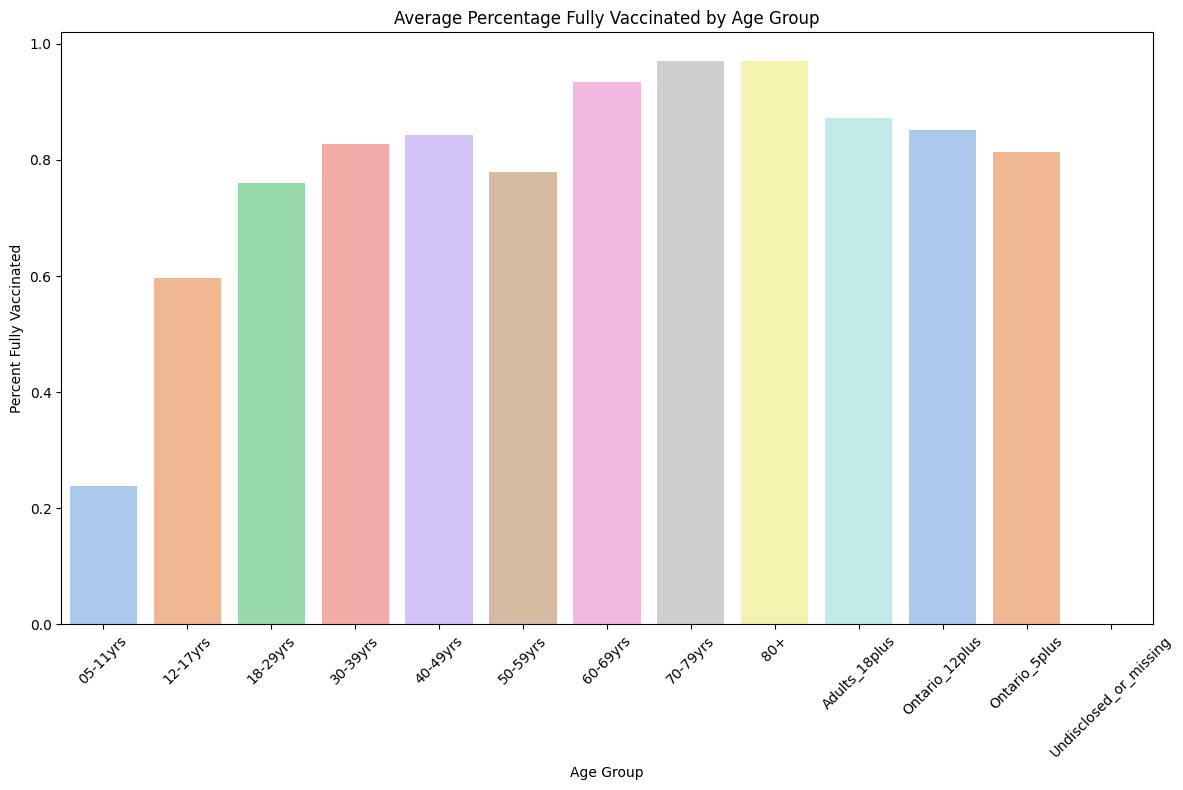

In [37]:
if 'Percent_fully_vaccinated' in data.columns and 'Agegroup' in data.columns:
    # Aggregate data by 'Agegroup'
    age_group_vaccination = data.groupby('Agegroup')['Percent_fully_vaccinated'].mean().reset_index()

    # Bar Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Agegroup', y='Percent_fully_vaccinated', data=age_group_vaccination, palette='pastel')
    plt.title('Average Percentage Fully Vaccinated by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Percent Fully Vaccinated')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

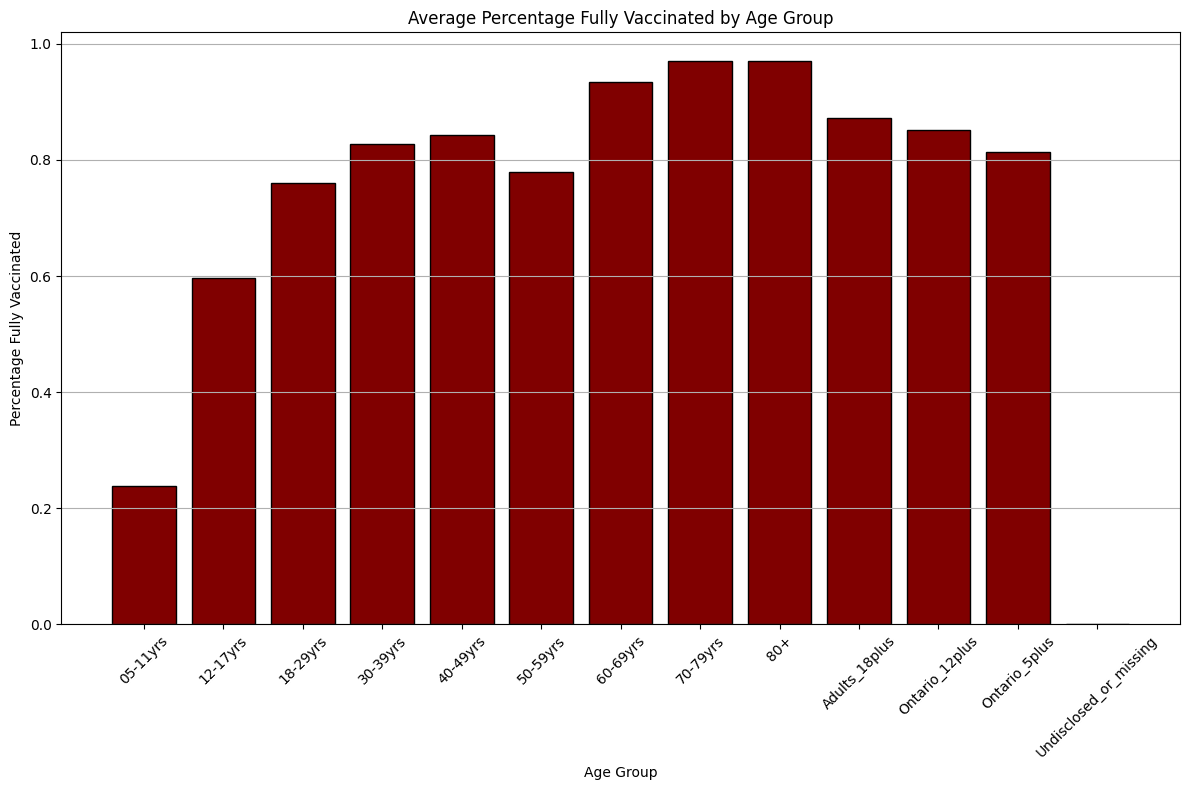

In [34]:
if 'Percent_fully_vaccinated' in data.columns and 'Agegroup' in data.columns:
    # Aggregate data by 'Agegroup' to calculate the average percentage fully vaccinated
    age_group_data = data.groupby('Agegroup')['Percent_fully_vaccinated'].mean().reset_index()

    # Plot
    plt.figure(figsize=(12, 8))
    plt.bar(age_group_data['Agegroup'], age_group_data['Percent_fully_vaccinated'], color='maroon', edgecolor='black')
    plt.title('Average Percentage Fully Vaccinated by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Percentage Fully Vaccinated')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y')  # Add grid lines only on y-axis
    plt.tight_layout()
    plt.show()

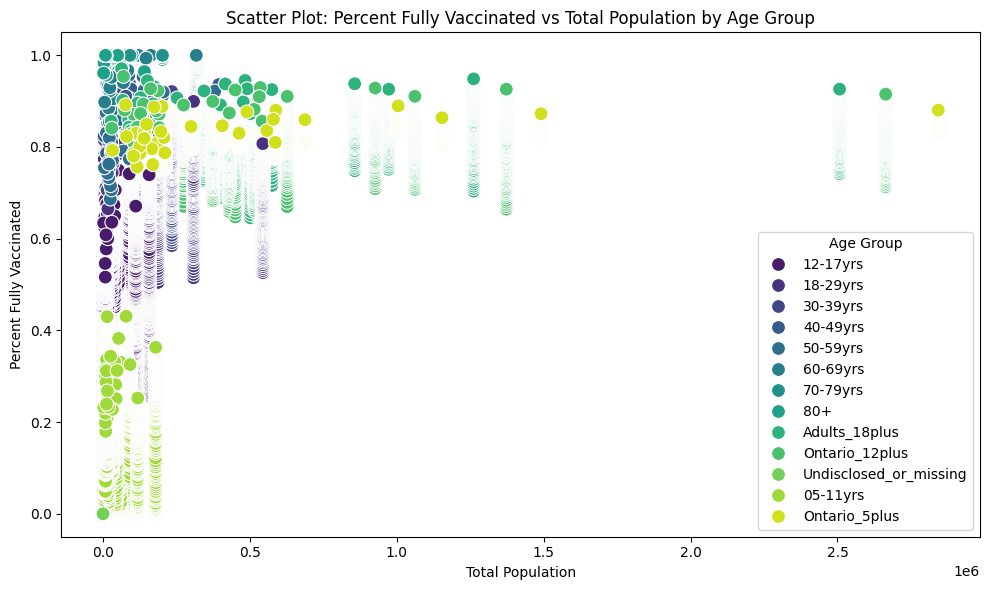

In [27]:
if 'Percent_fully_vaccinated' in data.columns and 'Total population' in data.columns:
    # Scatter Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Total population', y='Percent_fully_vaccinated', data=data, hue='Agegroup', palette='viridis', s=100)
    plt.title('Scatter Plot: Percent Fully Vaccinated vs Total Population by Age Group')
    plt.xlabel('Total Population')
    plt.ylabel('Percent Fully Vaccinated')
    plt.legend(title='Age Group')
    plt.tight_layout()
    plt.show()

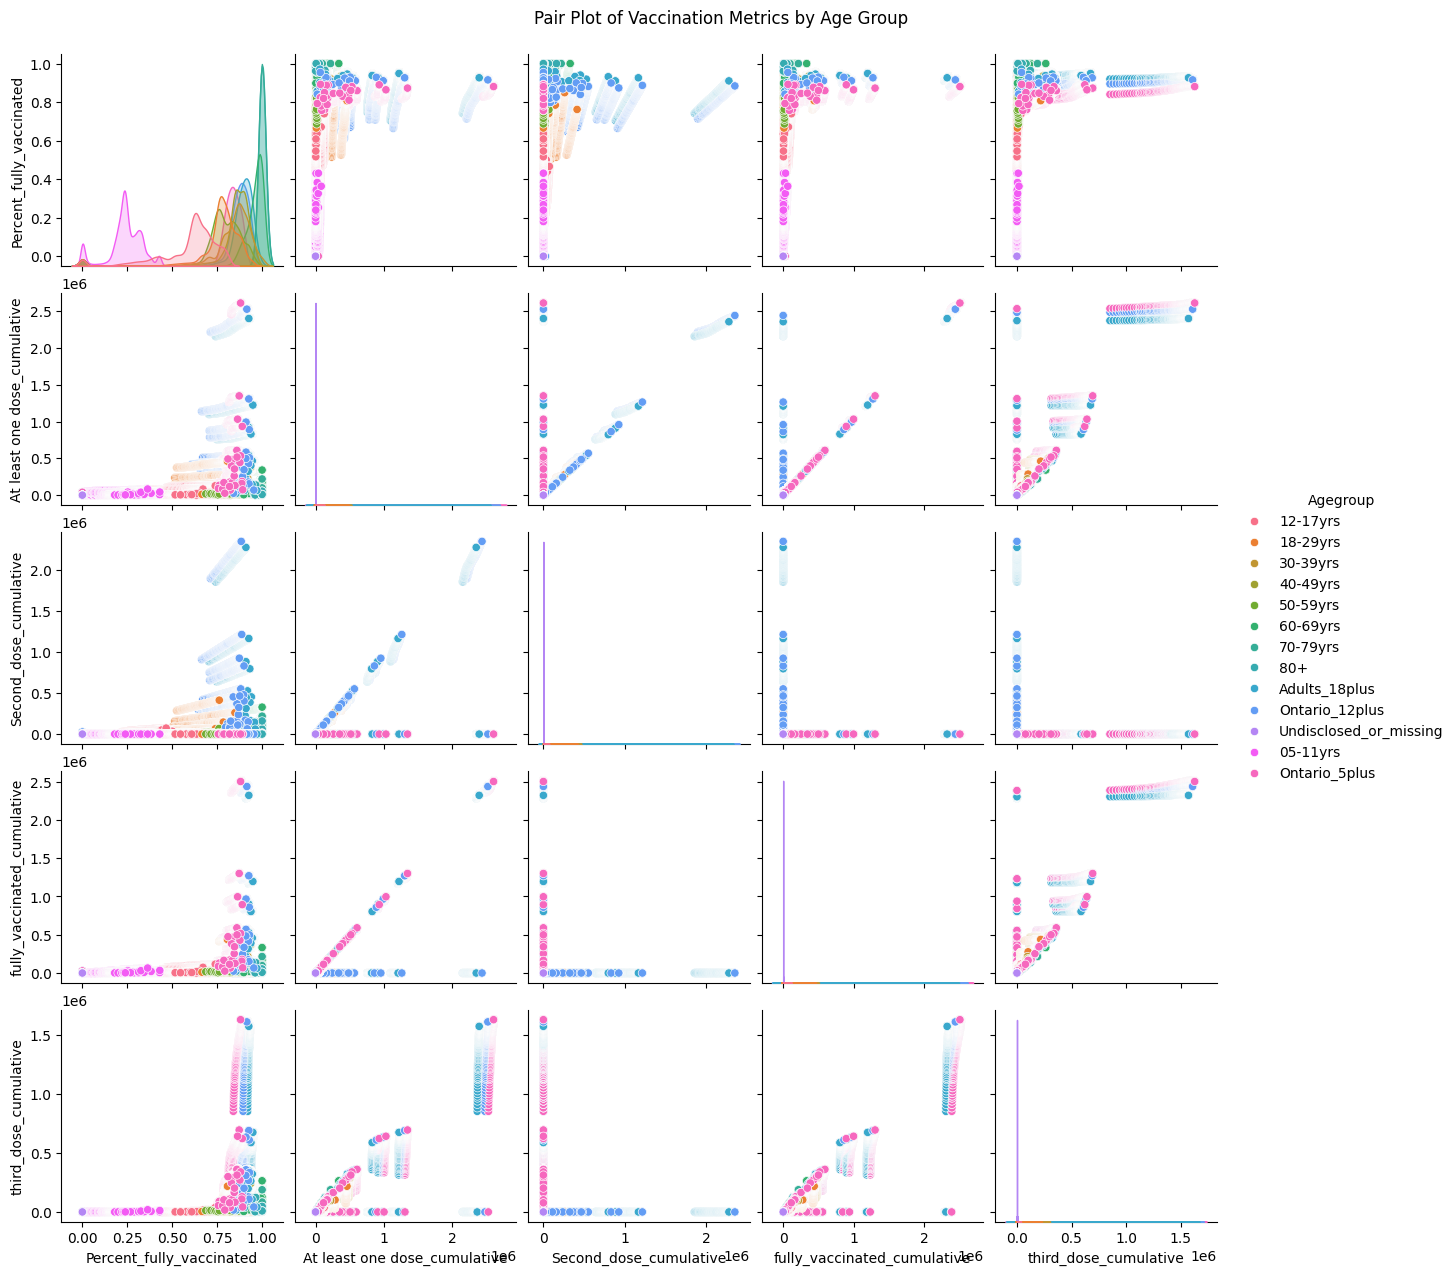

In [36]:
# Select relevant numerical columns for pairplot
numerical_cols = ['Percent_fully_vaccinated', 'At least one dose_cumulative', 'Second_dose_cumulative', 'fully_vaccinated_cumulative', 'third_dose_cumulative']
# Add 'Agegroup' for hue
data_subset = data[['Agegroup'] + numerical_cols].dropna()

# Create a pairplot with 'Agegroup' as the hue
sns.pairplot(data_subset, hue='Agegroup')
plt.suptitle('Pair Plot of Vaccination Metrics by Age Group', y=1.02)  # Title with padding
plt.show()